In [29]:
import sys
sys.path.append('../')  

from data.load_data import read_graphfile
from torch.utils.data import DataLoader
from utils.operations import *
from utils.graph_processing import *
import graph_tool.all as gt

In [30]:
graphs_train = read_graphfile("../datasets", "Tox21_HSE" + '_training', quiet=True, max_nodes=0)
graphs_test = read_graphfile("../datasets", "Tox21_HSE" + '_testing', quiet=True, max_nodes=0)
graphs = graphs_train + graphs_test
graphs_train_labels = [graph.graph['label'] for graph in graphs_train]
graphs_train = [graph for graph, label in zip(graphs_train, graphs_train_labels) if label == 0]

In [62]:
import pandas as pd
import jsonpickle

graphs_gen = pd.read_parquet("../bin/graphs.parquet")
graphs_gen = graphs_gen.sort_values('epoch', ascending=False)  

lowest_gloss_row = graphs_gen.iloc[1]    
encoded_final_graph = lowest_gloss_row['graph']
nx_g = jsonpickle.decode(encoded_final_graph)

print(lowest_gloss_row['epoch'])

20


6216


/opt/homebrew/Caskroom/miniconda/base/envs/gladgan/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:545: UserWarning: Unknown edge attribute: text_property
  warnings.warn(f"Unknown {kind} attribute: " + str(k), UserWarning)


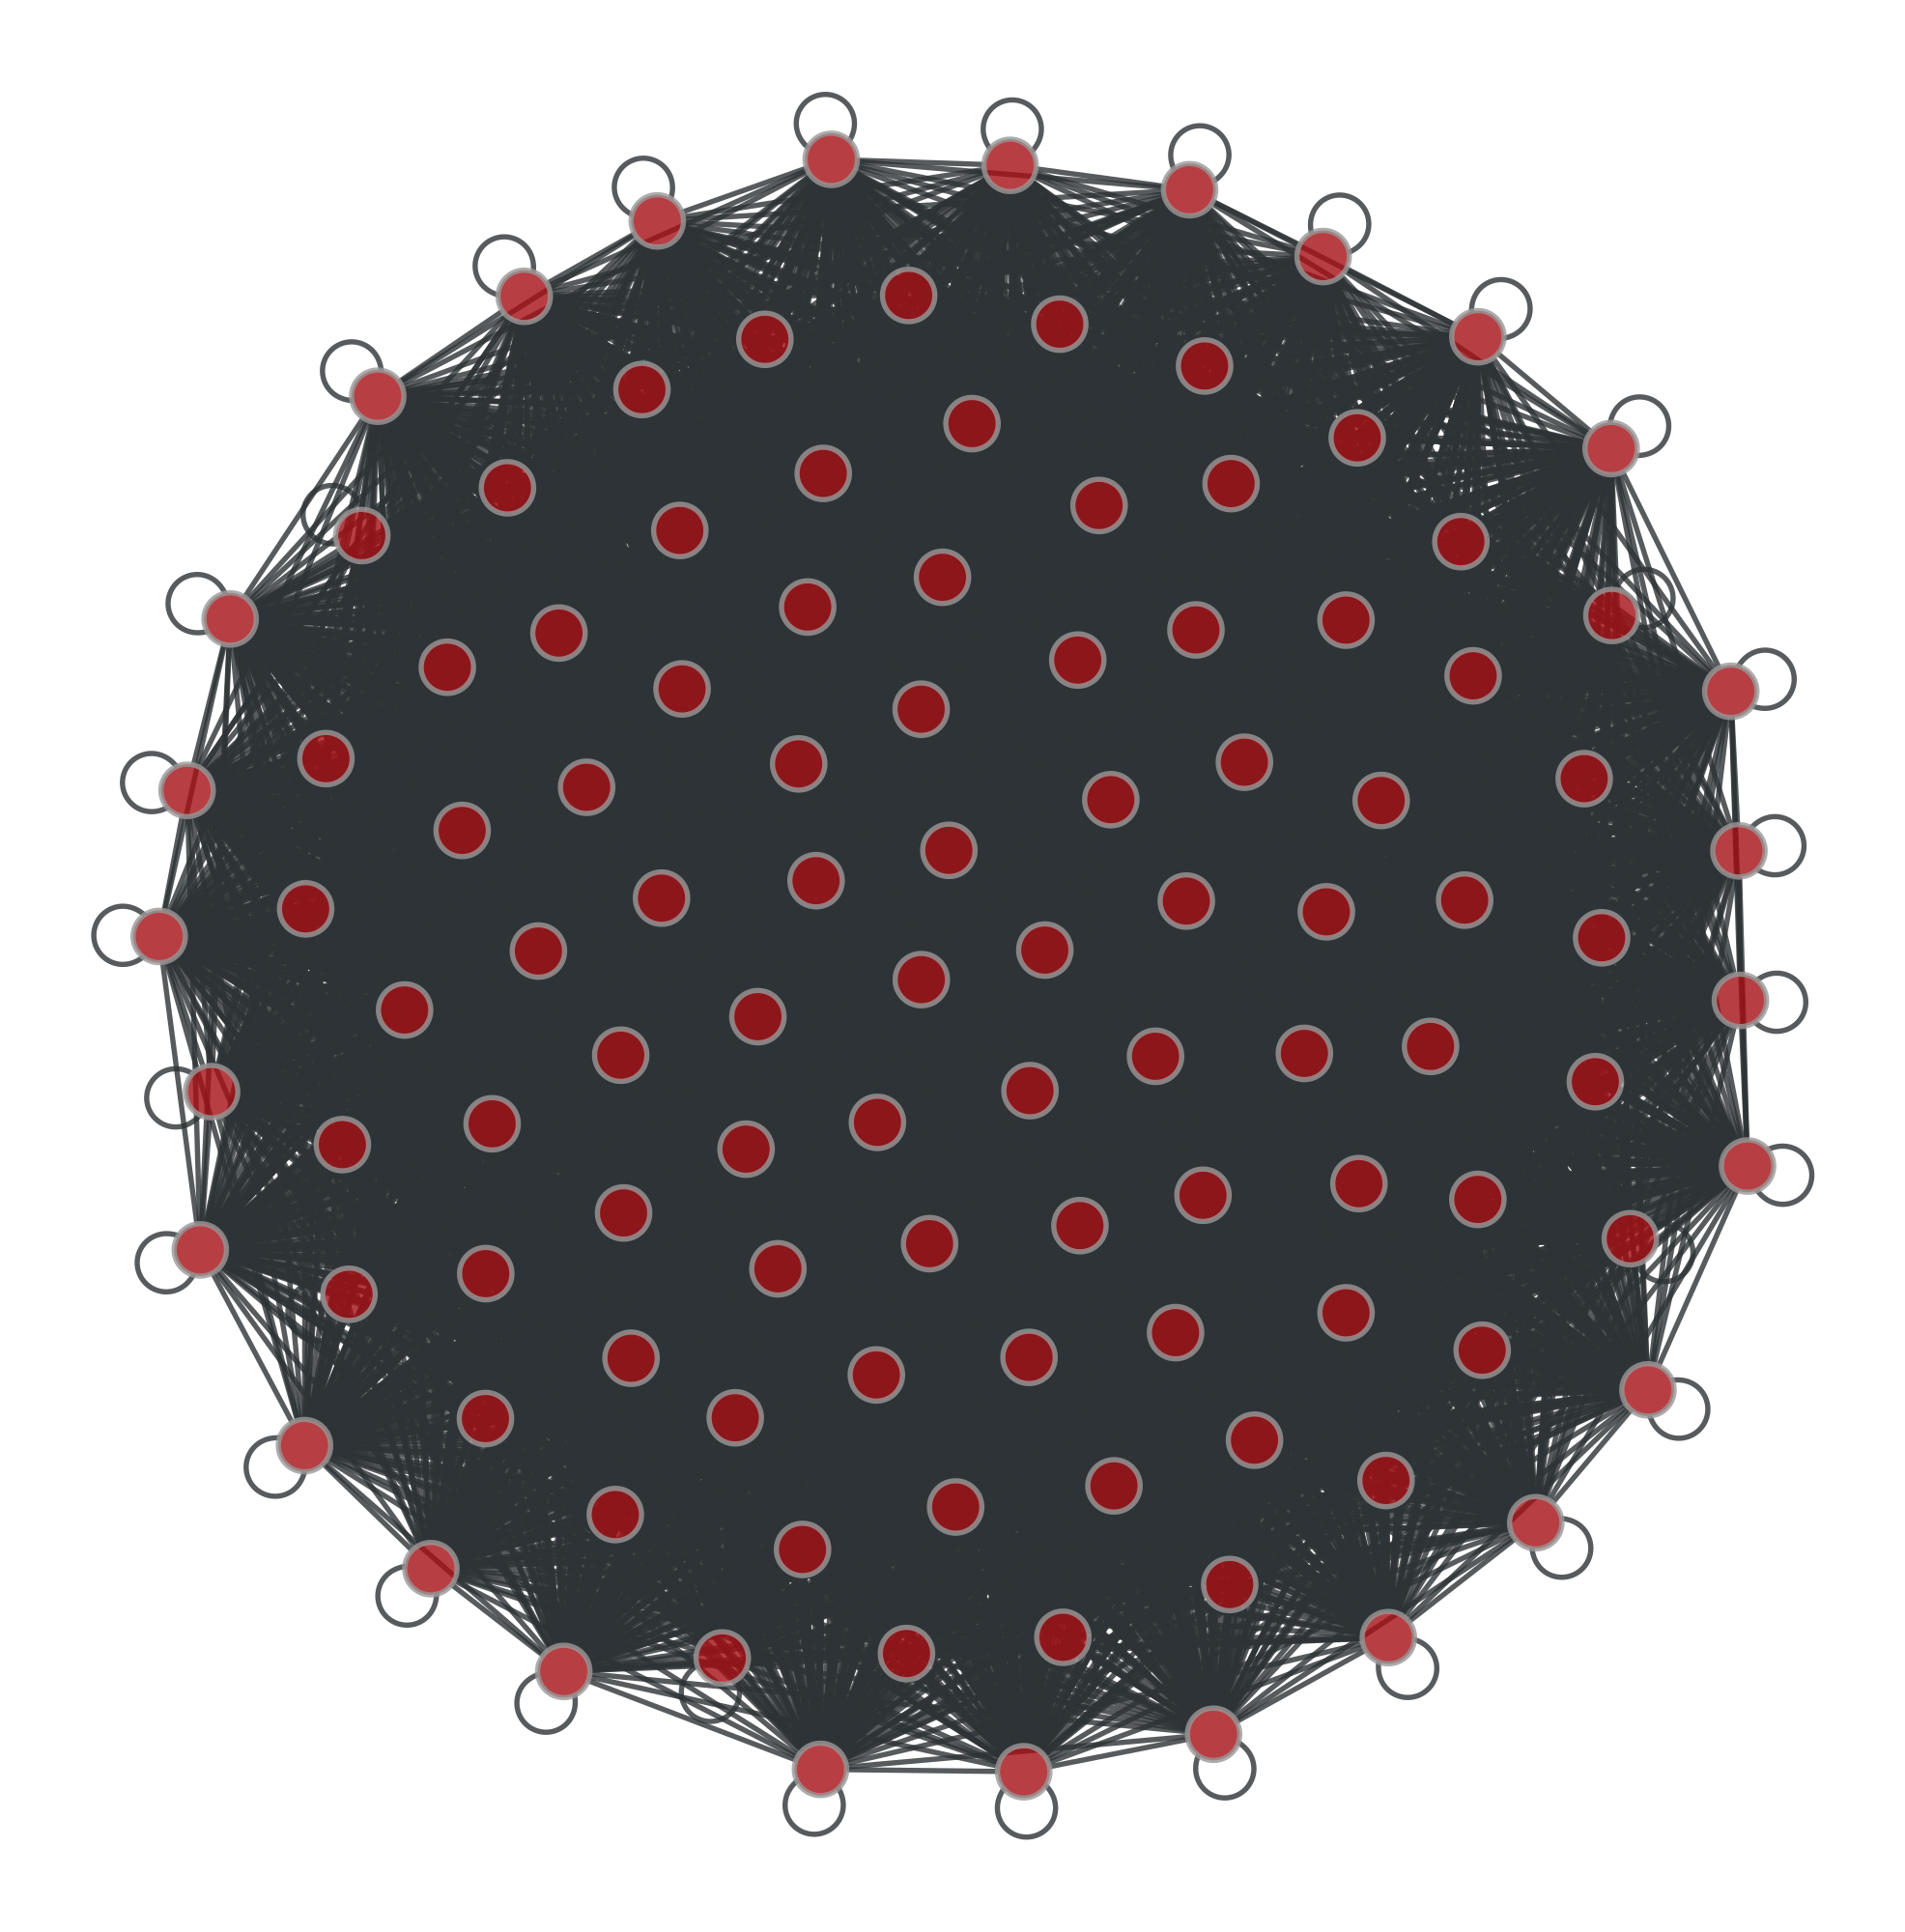

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x3482ca430, at 0x36616f5e0>

In [63]:
g = gt.Graph(directed=nx_g.is_directed())

for node in nx_g.nodes():
    g.add_vertex()

for edge in nx_g.edges:
    g.add_edge(edge[0], edge[1])

g.vertex_properties["label"] = g.new_vertex_property("string")

from graph_tool.draw import graph_draw

print(nx_g.size())

# graph_draw(g, output_size=(1000, 1000), vertex_text_property=g.vertex_properties["label"], output="graph.png")
graph_draw(g, output_size=(1000, 1000), vertex_text_property=g.vertex_properties["label"])
